In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import igraph
import matplotlib.patches as patches
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
sc.set_figure_params()
scf.set_figure_pubready()

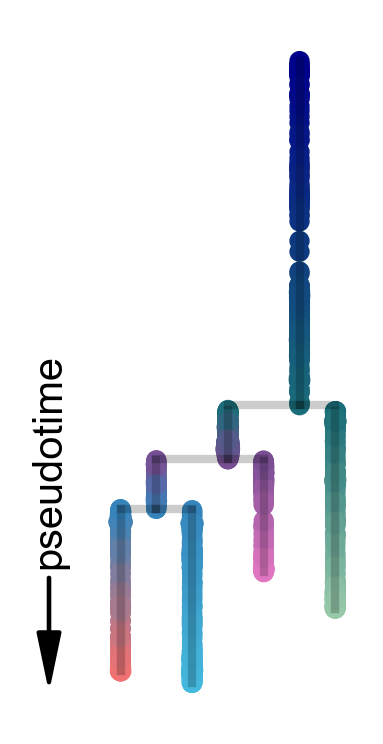

In [2]:

sc.set_figure_params(figsize=(1.3,3),frameon=False,dpi=150,dpi_save=600)
adata=sc.read("data/adata_tree_fitted.h5ad")
ax=scf.pl.dendrogram(adata,color_milestones=True,title="",show_info=False,linewidth_seg=2,alpha_seg=.2,show=False)
ax.set_xlim([-2,6.5])
ax.annotate("pseudotime",(-2,-36),(-2,-29),rotation=90,horizontalalignment='center',size=10,
            arrowprops=dict(facecolor="black",width=.1,headwidth=5))
plt.savefig("figures/dendrogram_milestones.pdf",bbox_inches="tight")

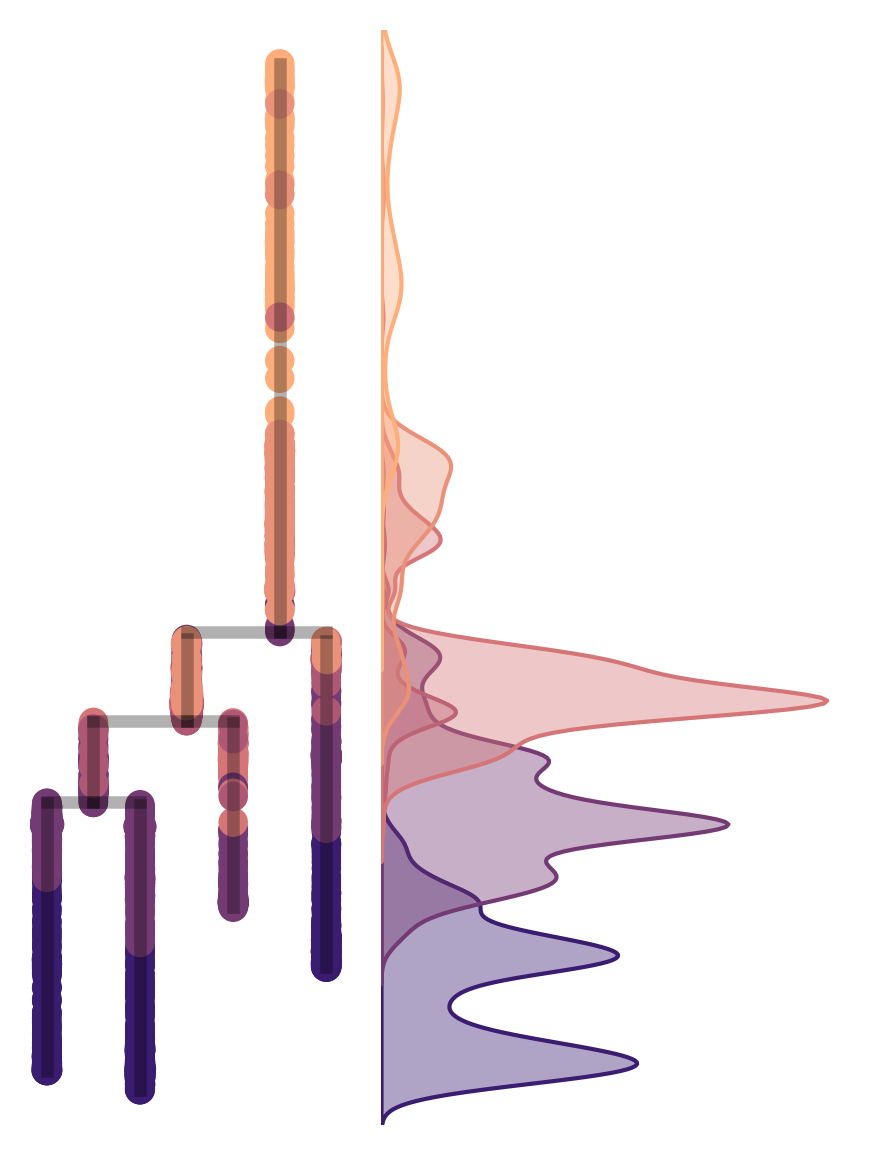

In [3]:
import seaborn as sns
sc.set_figure_params(figsize=(3.5,4.8),frameon=False,dpi=150,dpi_save=600)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,gridspec_kw={"width_ratios":(1,1.5),"wspace":0.1})
#fig.suptitle('Developmental time', fontsize=16)
scf.pl.dendrogram(adata,color="devtime",title="",legend_loc="none",ax=ax1,s=200,show=False,frameon=False)
df=adata.obs.copy()
df.t=-df.t
k=sns.kdeplot(data=df,y="t",hue="devtime",bw=.2,alpha=.4,fill=True,
              palette=adata.uns["devtime_colors"].tolist(),ax=ax2)
ax2.legend([],[], frameon=False)
ax2.axis('off')
ax2.set_ylim([df.t.min()-(df.t.max()-df.t.min())/30,
              df.t.max()+(df.t.max()-df.t.min())/30])
plt.savefig("figures/devtime_dendro_kde.pdf",bbox_inches="tight")

In [4]:
adata_Ia=sc.read("data/adata_Ia_traj.h5ad")
adata_Ib=sc.read("data/adata_Ib_traj.h5ad")
adata_Ic=sc.read("data/adata_Ic_traj.h5ad")
adata_II=sc.read("data/adata_II_traj.h5ad")
allgenes=pd.Series(np.concatenate([adata_Ic.var_names,adata_II.var_names,adata_Ia.var_names,adata_Ib.var_names]))
genes=((allgenes.value_counts()==1)[allgenes.value_counts()==1]).index

In [5]:
adata_A=sc.read("data/adata_A_traj.h5ad")

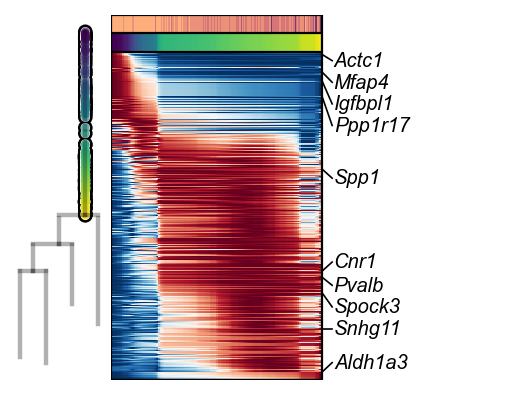

In [6]:
sc.set_figure_params(figsize=(1,4),dpi_save=600,frameon=False)
scf.pl.trends(adata_A,style="italic",annot="devtime",
              add_outline=True,s=60,figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,
              basis="dendro",color="t",cmap="viridis",ordering="max",pseudo_cmap="viridis",
              save_genes="immature_allgenes.tsv",clip_on=False,wspace=0,save="-immature.pdf")

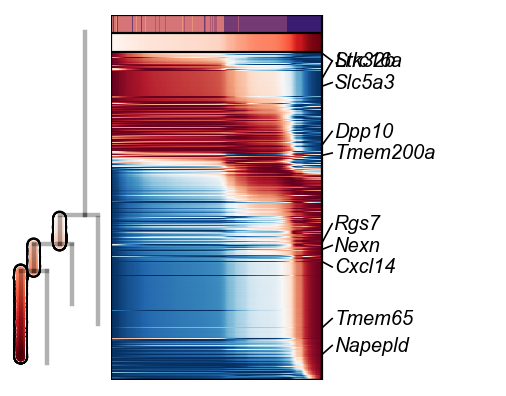

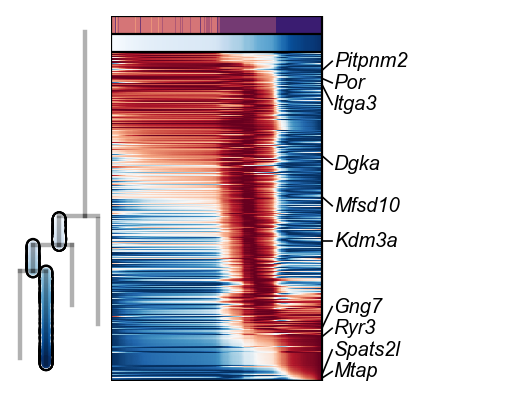

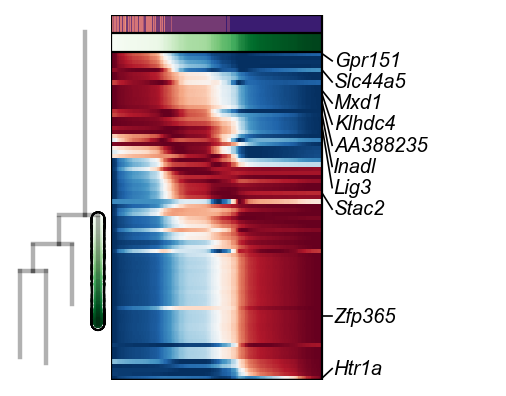

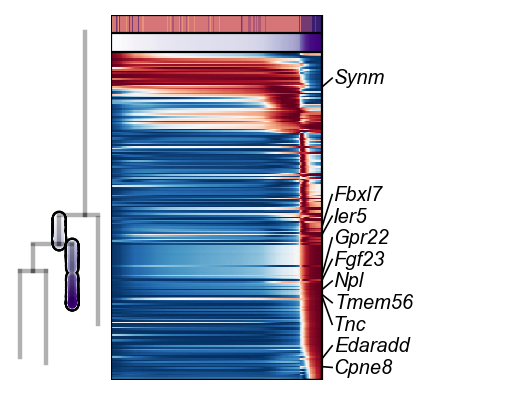

In [7]:
sc.set_figure_params(figsize=(1,4),dpi_save=600,frameon=False)
scf.pl.trends(adata_Ia[:,adata_Ia.var_names.isin(genes)],style="italic",annot="devtime",
              add_outline=True,s=60,figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,
              basis="dendro",color="t",cmap="Reds",ordering="max",pseudo_cmap="Reds",
              save_genes="Ia_allgenes.tsv",clip_on=False,wspace=0,save="-Ia.pdf")

scf.pl.trends(adata_Ib[:,adata_Ib.var_names.isin(genes)],style="italic",annot="devtime",
              add_outline=True,s=60,figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,
              basis="dendro",color="t",cmap="Blues",ordering="max",pseudo_cmap="Blues",
              save="-Ib.pdf",save_genes="Ib_allgenes.tsv",clip_on=False,wspace=0)

scf.pl.trends(adata_Ic[:,adata_Ic.var_names.isin(genes)],style="italic",annot="devtime",
              add_outline=True,s=60,figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,
              basis="dendro",color="t",cmap="Greens",ordering="max",pseudo_cmap="Greens",
              save="-Ic.pdf",save_genes="Ic_allgenes.tsv",clip_on=False,wspace=0)

scf.pl.trends(adata_II[:,adata_II.var_names.isin(genes)],style="italic",annot="devtime",
              add_outline=True,s=60,figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,
              basis="dendro",color="t",cmap="Purples",ordering="max",pseudo_cmap="Purples",
              save="-II.pdf",save_genes="II_allgenes.tsv",clip_on=False,wspace=0)

In [18]:
adata_Ia.var.iloc[:,-5:-2]

p_val         A           fdr
Adora1   3.291285e-13  0.658681  6.812632e-09
Obsl1    1.967907e-10  0.681712  4.073371e-06
Pld5     2.526666e-54  1.164435  5.229946e-50
Khdrbs2  2.492850e-25  0.937171  5.159951e-21
Plcl1    3.208962e-13  0.647572  6.642231e-09
...               ...       ...           ...
Eno4     5.693514e-11  0.396846  1.178500e-06
Slc18a2  5.796311e-15  0.808618  1.199778e-10
Pdzd8    1.341465e-10  0.569010  2.776698e-06
Prdx3    1.257180e-36  0.542048  2.602237e-32
Sfxn4    2.630572e-09  0.650780  5.445021e-05

[3619 rows x 3 columns]

In [19]:
writer = pd.ExcelWriter('data/fig2_separate_paths.xlsx', engine='xlsxwriter')

for adata,path in zip([adata_Ia,adata_Ib,adata_Ic,adata_II],["Ia","Ib","Ic","II"]):
    genes=pd.read_table(f"{path}_allgenes.tsv",header=None)[0].values
    adata.var.loc[genes].iloc[:,-5:-2].to_excel(writer,sheet_name="path to %s" %path)
    
writer.save()

In [20]:
#pd.read_table("scenic/mm_mgi_tfs.txt",header=None).values.ravel()
#TFs=(pd.read_table("trrust_rawdata.mouse.tsv",header=None)[0].unique())
TFs=pd.read_table("Mus_musculus_TF.txt").Symbol.values

In [27]:
def plot_updown(adata,ntops=4,key=None,do_annot=False,link_seg=True,ret_annot_order=False,ret_expr_vals=False):   
    graph = adata.uns["graph"]

    dct = graph["milestones"]
    keys = np.array(list(dct.keys()))
    vals = np.array(list(dct.values()))

    edges = graph["pp_seg"][["from", "to"]].astype(str).apply(tuple, axis=1).values
    img = igraph.Graph(directed=True)
    img.add_vertices(vals.astype(str))
    img.add_edges(edges)

    allpaths=img.get_all_shortest_paths(str(graph["root"]),to=graph["tips"].astype(str))

    allpaths=np.array(allpaths,dtype=object)[np.argsort(np.array([len(p) for p in allpaths]))]

    order=allpaths[0]
    for i in range(1,len(allpaths)):
        order=order+np.array(allpaths[i])[~np.isin(allpaths[i],order)].tolist()

    order=np.array(order)[1:]

    order=pd.Series(graph["milestones"].keys(),index=graph["milestones"].values())[np.array(img.vs["name"])[order].astype(int)]
    order=pd.Series(range(len(adata.obs.seg.cat.categories)),index=graph["pp_seg"]["to"])[order.index].values

    vs2mils=pd.Series(dct.keys(),index=dct.values())
    
    def get_genes(s,tf=False):
        genes=adata.var_names if key is None else adata.var_names[adata.var[key]]
        diffs=adata[adata[adata.obs.seg==s].obs.t.idxmax(),genes].layers["fitted"]-adata[adata[adata.obs.seg==s].obs.t.idxmin(),genes].layers["fitted"]
        up=pd.Series(diffs.ravel(),index=genes).sort_values().index[-ntops:]
        down=pd.Series(diffs.ravel(),index=genes).sort_values().index[:ntops]
        return np.concatenate([up,down])


    gg=pd.DataFrame(dict(zip(adata.obs.seg.cat.categories[order],[get_genes(adata.obs.seg.cat.categories[s],tf=True) for s in order])))
    gglst=gg.values.T.ravel()

    def get_seg(s):
        start=adata.obs.milestones[adata.obs.t[s.index].idxmin()]
        end=adata.obs.milestones[adata.obs.t[s.index].idxmax()]
        return pd.DataFrame([adata[s.index[s==c],gglst].X.A.mean(axis=0) for c in [start,end]],
                             index=[start,end],columns=gglst).T
    
    cellsel=[adata.obs.milestones[adata.obs.seg==s] for s in adata.obs.seg.cat.categories[order]]

    expr_vals=pd.concat([get_seg(s) for s in cellsel],axis=1)
    res=(expr_vals.T/expr_vals.max(axis=1).values).T*200

    res=res.iloc[::-1,:]
    from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
    import matplotlib.cm as cm

    fig, axs = plt.subplots(
        1,
        len(order)+1*do_annot,
        constrained_layout=True,
        sharey=True,
        figsize=(2*len(order) / 3+2+2*do_annot,2 * ntops*2*len(order) / 7)

    )
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    pos=np.arange(len(order),0,-1)
    caxs = []
    for i,s in enumerate(np.arange(0,len(order)*2,2)):
        tocomp=res.iloc[:,[s,s+1]]
        xs = np.arange(tocomp.shape[0])
        ys = np.arange(tocomp.shape[1])
        X, Y = np.meshgrid(xs, ys)
        
        ss=int(adata.obs.seg.cat.categories[order[i]][0])
        sel=adata.obs.milestones.cat.categories==vs2mils[graph["pp_seg"].loc[ss]["from"]]
        start=np.array(adata.uns["milestones_colors"])[sel][0]
        sel=adata.obs.milestones.cat.categories==vs2mils[graph["pp_seg"].loc[ss]["to"]]
        end=np.array(adata.uns["milestones_colors"])[sel][0]

        from matplotlib.colors import LinearSegmentedColormap
        my_cm=LinearSegmentedColormap.from_list("aspect",[start,end])
        
        rect = patches.Rectangle((-0.5, (pos[i]*8)-8.5), 2, 8, linewidth=1, alpha=.3,
                                 edgecolor=end, facecolor=end,zorder=-1)

        # Add the patch to the Axes
        axs[i].add_patch(rect)
        
        axs[i].scatter(
            Y, X, s=tocomp.values.T,c=tocomp.values.T,cmap="RdBu_r",edgecolors='k',linewidth=.5
        )
        axs[i].grid(b=None)
        axs[i].set_yticks(range(tocomp.shape[0]));
        axs[i].set_yticklabels(gglst[::-1],style="italic");
        axs[i].set_xticks([])
        axs[i].set_xlim([-0.5, tocomp.shape[1] - 0.5])
        axs[i].set_ylim([-0.5, tocomp.shape[0] - 0.5])

        divider = make_axes_locatable(axs[i])
        cax = divider.new_vertical(size=.2, pad=0.05, pack_start=False)
        caxs.append(cax)
        mappable = cm.ScalarMappable(cmap=my_cm)

        fig.add_axes(cax)
        cbar=fig.colorbar(mappable, cax=cax,orientation='horizontal')
        cbar.set_ticks([])
   
    if do_annot:
        divider = make_axes_locatable(axs[i+1])
        cax = divider.new_vertical(size=0.2, pad=0.05, pack_start=False)
        from matplotlib import collections  as mc
        import matplotlib.patheffects as path_effects
        lines=[]
        for j in np.arange(0,len(gglst),ntops*2):
            lines = lines+[[(0, 0+j), (0.5, 0+j)],[(0.5, ntops*2-1+j), (0.5, 0+j)],[(0,ntops*2-1+j), (0.5, ntops*2-1+j)]]

        lc = mc.LineCollection(lines, colors="k", linewidths=1.5,path_effects=[path_effects.Stroke(capstyle="round")])
        axs[i+1].add_collection(lc);
        axs[i+1].set_axis_off()
        order=order[::-1]
        for j,p in enumerate(np.arange(0,len(gglst),ntops*2)+ntops-0.25):
            txt="->".join(vs2mils[graph["pp_seg"].loc[int(adata.obs.seg.cat.categories[order[j]])][["from","to"]]])
            axs[i+1].text(1,p,txt,
                verticalalignment='top')
    if link_seg:
        caxs_dct = dict(zip([adata.obs.seg.cat.categories[o] for o in order], caxs))

        kw = dict(
            arrowprops=dict(
                arrowstyle="<|-",
                facecolor="k",
                connectionstyle="bar,fraction=.2",
                shrinkA=0.1,
            ),
            zorder=0,
            va="center",
            xycoords="axes fraction",
            annotation_clip=False,
        )

        kwclose = dict(
            arrowprops=dict(
                arrowstyle="<|-",
                facecolor="k",
                connectionstyle="bar,fraction=1",
                shrinkA=0.1,
            ),
            zorder=0,
            va="center",
            xycoords="axes fraction",
            annotation_clip=False,
        )

        pp_seg = adata.uns["graph"]["pp_seg"]

        dsts = pd.Series(range(len(caxs_dct)), index=caxs_dct.keys())
        for s, cax in caxs_dct.items():
            fro = pp_seg.loc[int(s), "from"]
            to = pp_seg.loc[int(s), "to"]
            for n in pp_seg.index[pp_seg["from"] == to]:
                if dsts[str(n)] - dsts[s] > 1:
                    cax.annotate("", xy=[1, 1], xytext=[2.4, 1], **kw)
                else:
                    cax.annotate("", xy=[1, 1], xytext=[1.2, 1], **kwclose)
                    
    if ret_annot_order:
        txts=[]
        for j,p in enumerate(np.arange(0,len(gglst),ntops*2)+ntops-0.25):
            txts.append("->".join(vs2mils[graph["pp_seg"].loc[int(adata.obs.seg.cat.categories[order[j]])][["from","to"]]]))
        return dict(zip(order,txts))
    if ret_expr_vals:
        return expr_vals


In [28]:
import numpy as np
def make_dots(ax):
    dot_max=1
    dot_min=0
    diff = dot_max - dot_min
    if 0.3 < diff <= 0.6:
        step = 0.1
    elif diff <= 0.3:
        step = 0.05
    else:
        step = 0.2
    # a descending range that is afterwards inverted is used
    # to guarantee that dot_max is in the legend.
    size_range = np.arange(dot_max, dot_min, step * -1)[::-1]
    if dot_min != 0 or dot_max != 1:
        dot_range = dot_max - dot_min
        size_values = (size_range - dot_min) / dot_range
    else:
        size_values = size_range

    size = size_values ** 1.5
    size = size * (200.0)

    cols=cm.RdBu_r([.2,.4,.6,.8,1])
    # plot size bar
    ax.scatter(
        np.arange(len(size)) + 0.5,
        np.repeat(0, len(size)),
        s=size,
        color=cols,
        edgecolor='black',
        linewidth=.2,
        zorder=100,
    )
    ax.set_xticks(np.arange(len(size)) + 0.5)
    labels = [
        "{}".format(np.round((x), decimals=1)) for x in size_range
    ]
    ax.set_xticklabels(labels, fontsize='small')

    # remove y ticks and labels
    ax.tick_params(
        axis='y', left=False, labelleft=False, labelright=False
    )

    # remove surrounding lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(False)

    ymax = ax.get_ylim()[1]
    ax.set_ylim(-.2, 2)
    ax.set_title('Dotplot legend\n\n\nStandardized\nexpression', y=ymax+.1)
    xmin, xmax = ax.get_xlim()
    ax.set_xlim(xmin - 0.15, xmax + 0.5)

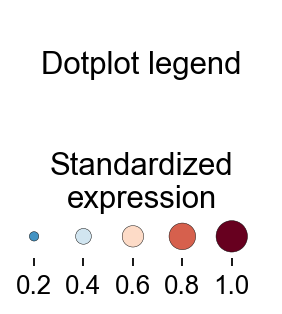

In [29]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(figsize=(2,2))
make_dots(ax)
plt.savefig("figures/fig2_legend.pdf",bbox_inches="tight")

In [48]:
adata=sc.read("data/adata_tree_fitted.h5ad")
adata.var["TF"]=adata.var_names.isin(TFs)
sc.set_figure_params()

<ipython-input-27-329de431e62a>:90: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[i].grid(b=None)
<ipython-input-27-329de431e62a>:103: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(mappable, cax=cax,orientation='horizontal')


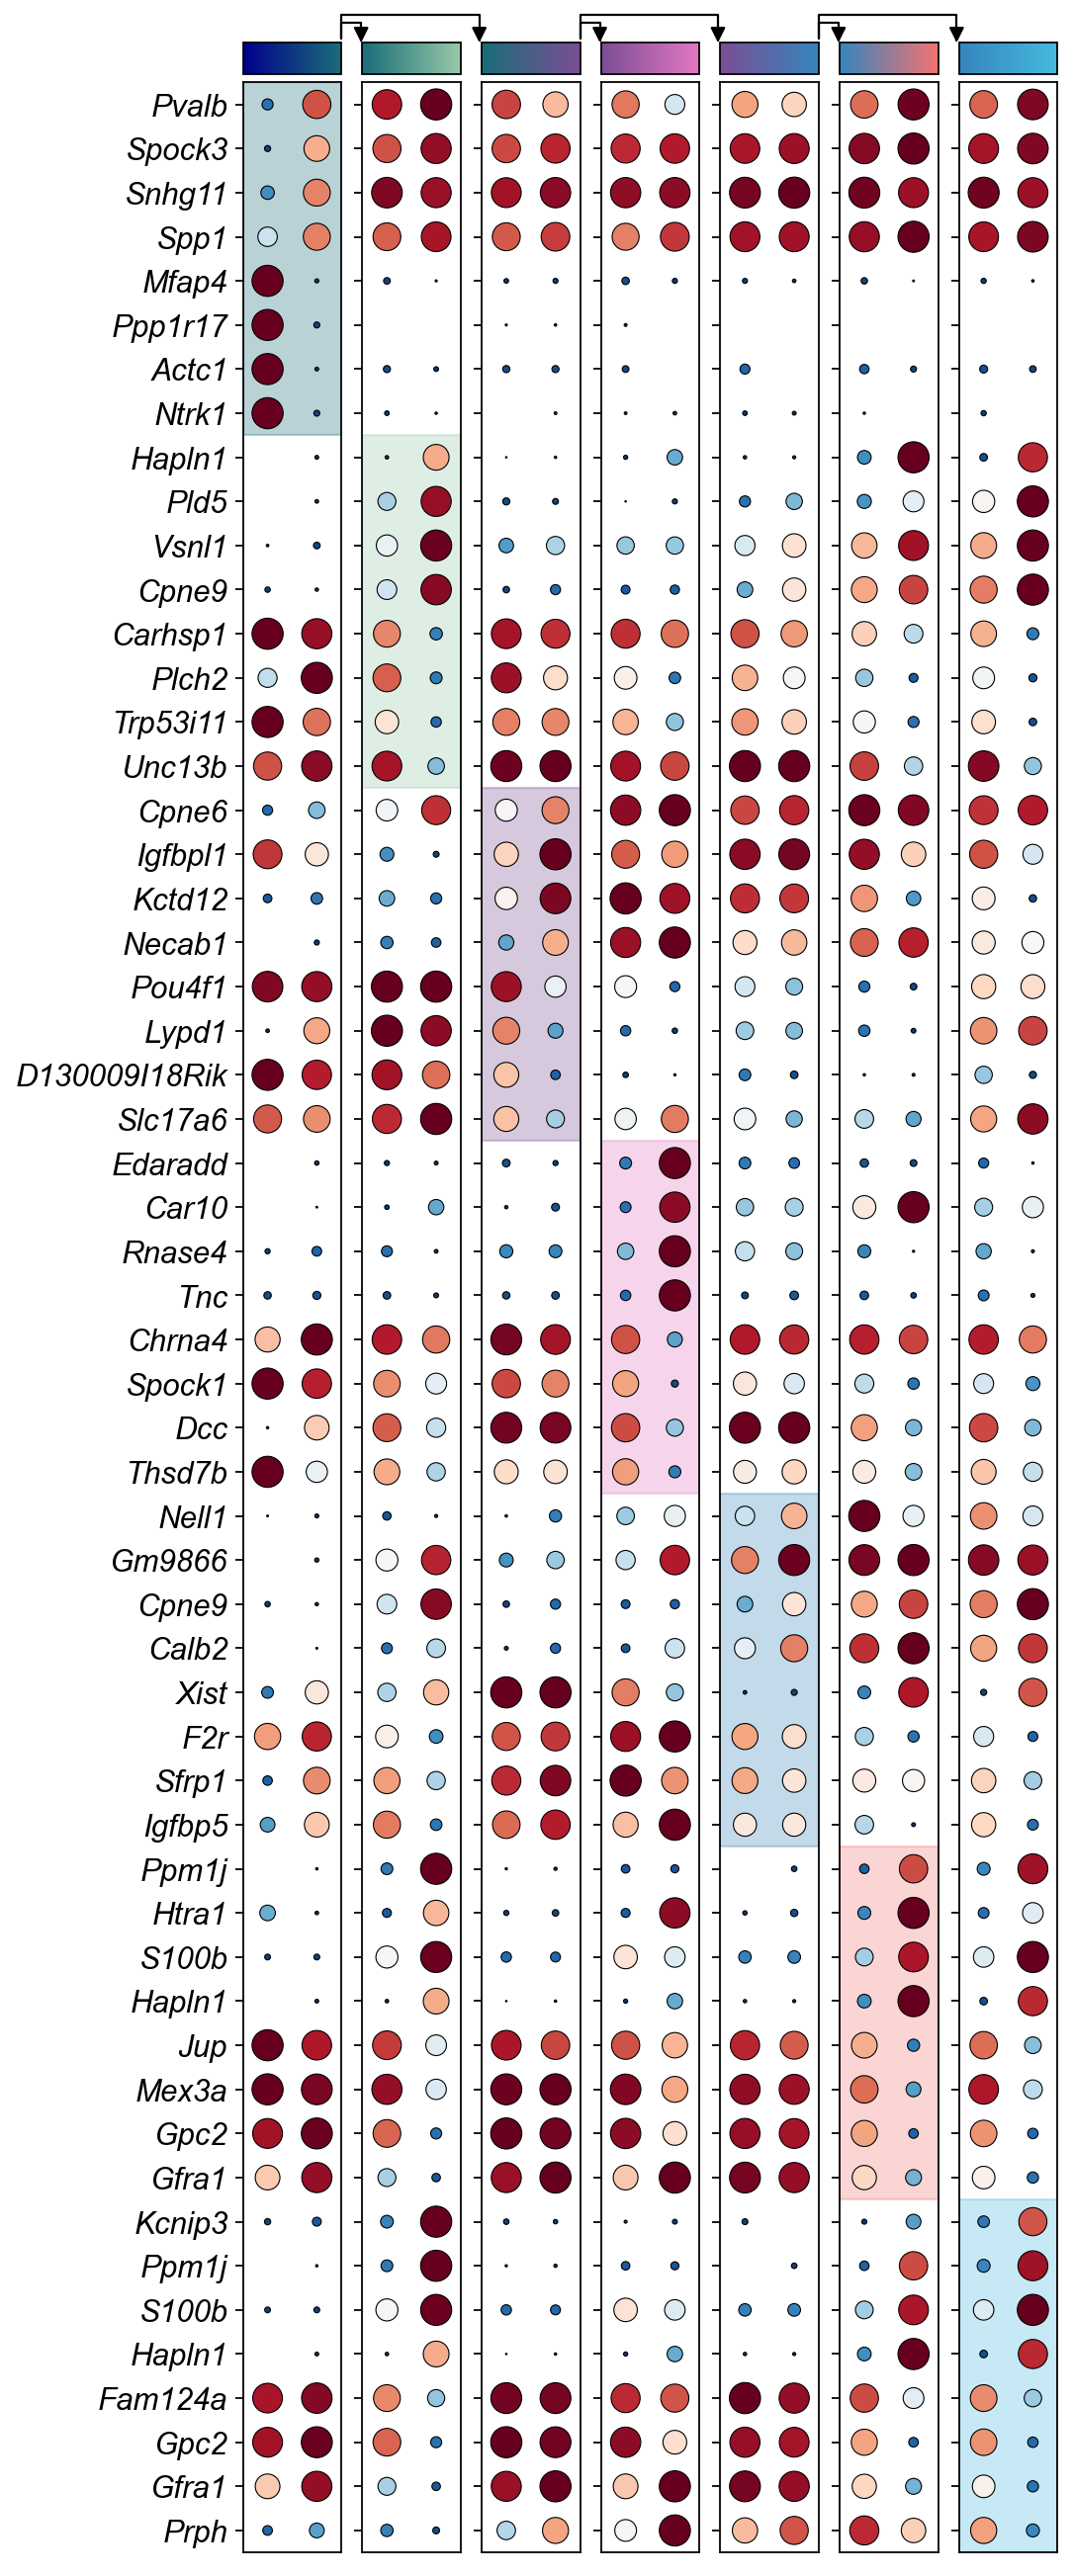

In [49]:
df=plot_updown(adata,ret_expr_vals=True)
plt.savefig("figures/dotplot_updown.pdf",transparent=True,bbox_inches="tight")

In [50]:
df.columns=np.tile(["from ","to "],7)+df.columns

df.to_csv("data/fig2h_data.csv")

<ipython-input-27-329de431e62a>:90: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[i].grid(b=None)
<ipython-input-27-329de431e62a>:103: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(mappable, cax=cax,orientation='horizontal')


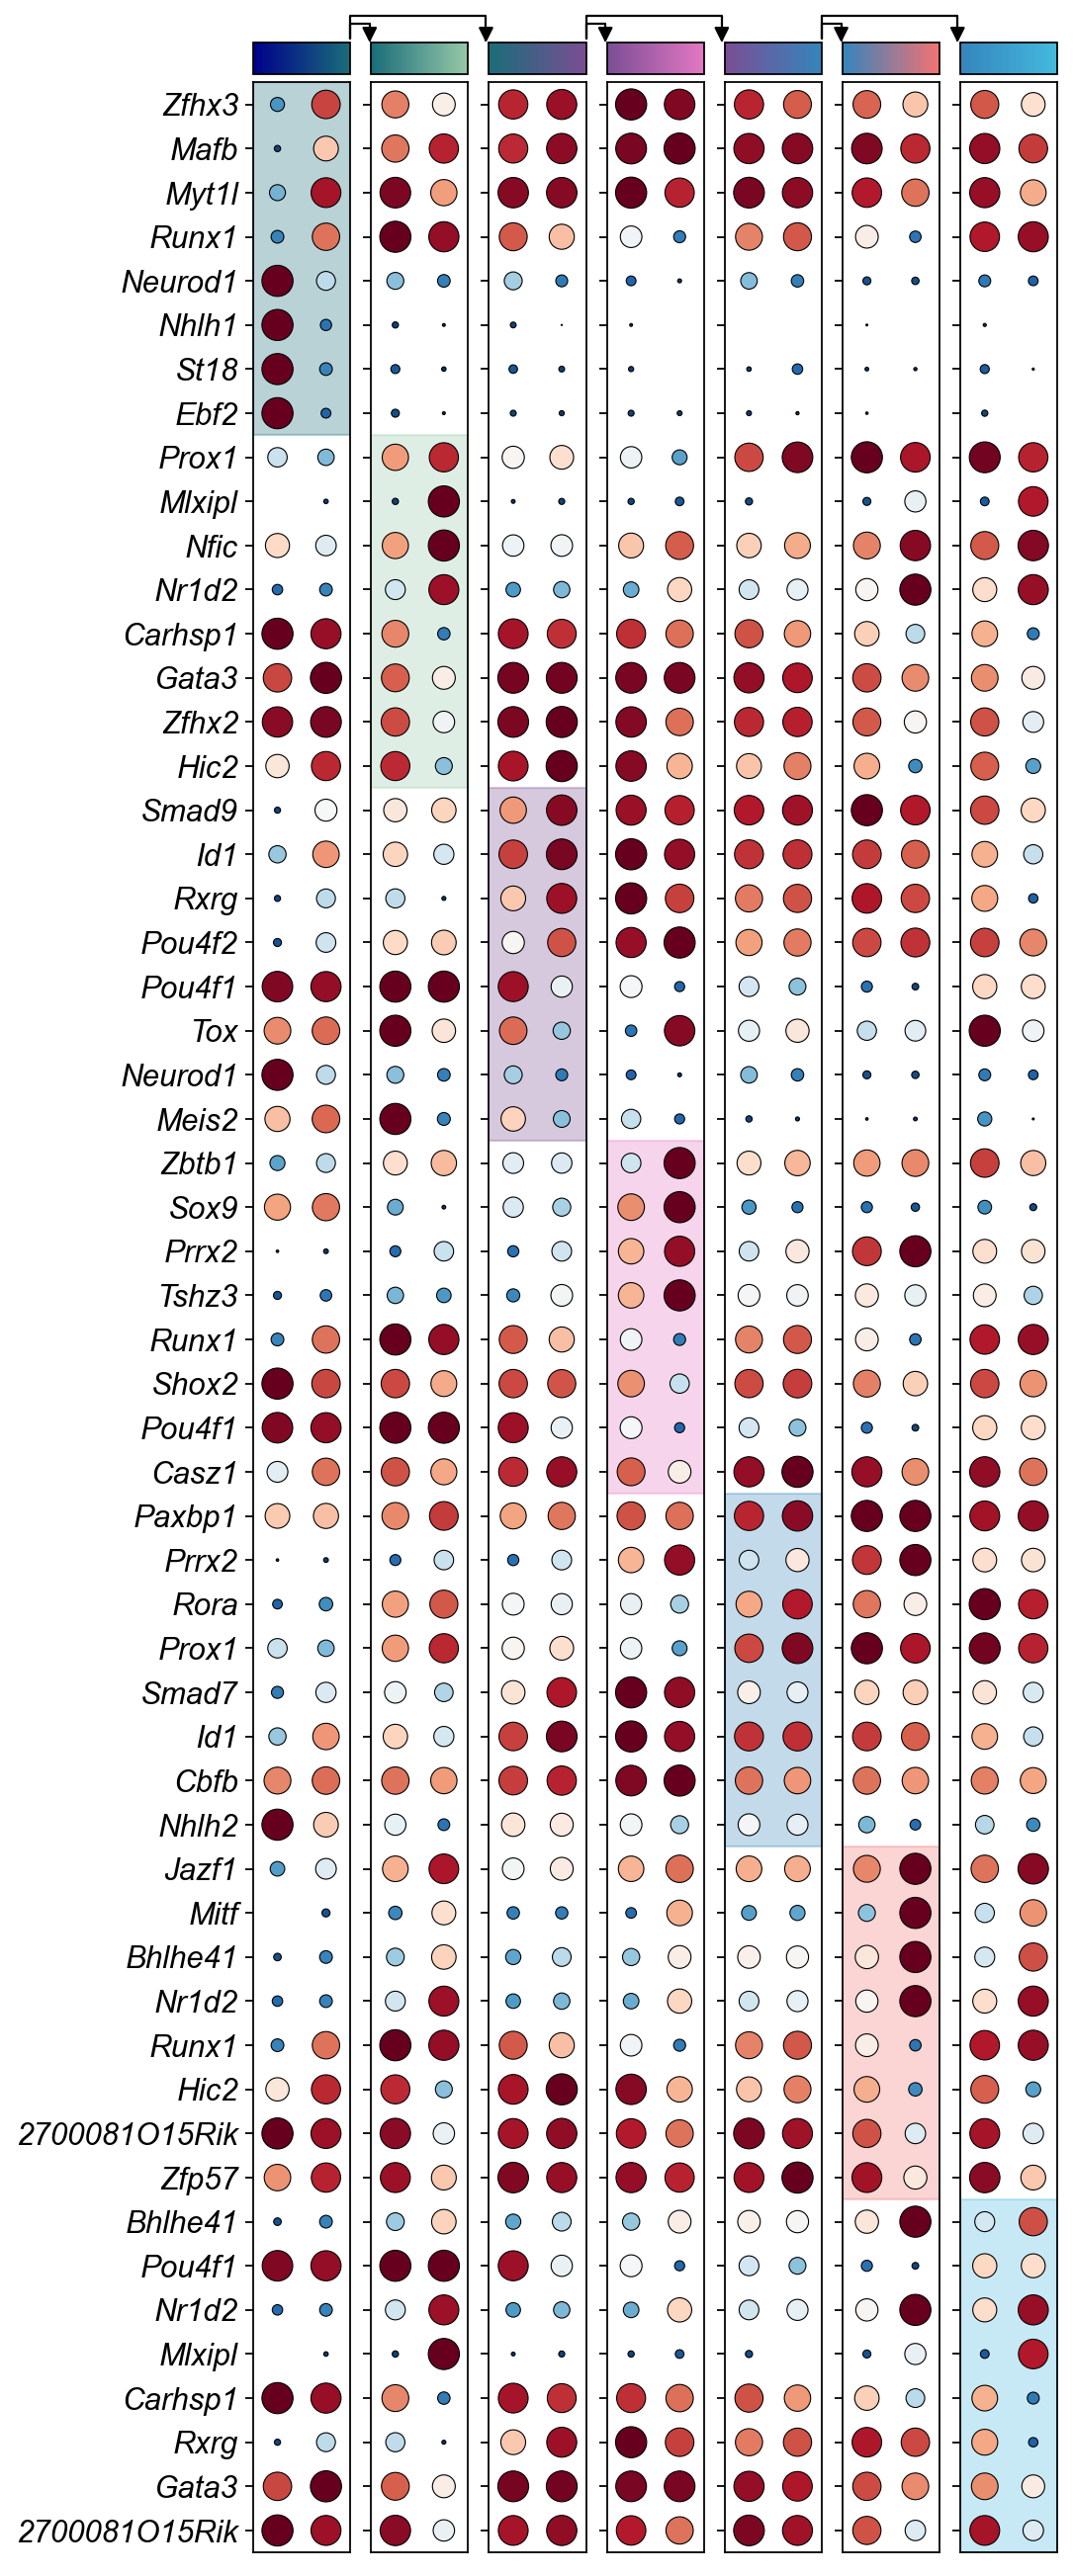

In [51]:
df=plot_updown(adata,4,"TF",ret_expr_vals=True)

plt.savefig("figures/dotplot_updown_TF.pdf",transparent=True,
           bbox_inches="tight")

df.columns=np.tile(["from ","to "],7)+df.columns

df.to_csv("data/fig2i_data.csv")

In [53]:
adata.var[["A","fdr"]].to_csv("data/all_diff_pseudo.csv")

In [15]:
import igraph

graph = adata.uns["graph"]

dct = graph["milestones"]
keys = np.array(list(dct.keys()))
vals = np.array(list(dct.values()))

edges = graph["pp_seg"][["from", "to"]].astype(str).apply(tuple, axis=1).values
img = igraph.Graph(directed=True)
img.add_vertices(vals.astype(str))
img.add_edges(edges)

allpaths=img.get_all_shortest_paths(str(graph["root"]),to=graph["tips"].astype(str))

allpaths=np.array(allpaths,dtype=object)[np.argsort(np.array([len(p) for p in allpaths]))]

order=allpaths[0]
for i in range(1,len(allpaths)):
    order=order+np.array(allpaths[i])[~np.isin(allpaths[i],order)].tolist()

order=np.array(order)

order=pd.Series(graph["milestones"].keys(),index=graph["milestones"].values())[np.array(img.vs["name"])[order].astype(int)]

In [16]:
def get_DEP(m,tf=False,key=None):
    genes=adata.var_names if key is None else adata.var_names[adata.var[key]]
    means=adata[adata.obs.milestones==m,genes].X.A.mean(axis=0)
    return pd.Series(means.ravel(),index=genes,name=m)

In [17]:
DEP=pd.concat([get_DEP(m) for m in adata.obs.milestones.cat.categories],axis=1)[order.values]
df=adata.var[["p_val","A","fdr"]]
df.columns=["pval","Amplitude","fdr"]

In [18]:
DEP=pd.concat([df,DEP],axis=1)

In [19]:
DEP.to_csv("data/DEP.csv")

In [20]:
DEP.loc[adata.var.TF].to_csv("data/DEP_TF.csv")

In [21]:
# def get_all_genes(s,tf=False):
#     genes=adata.var_names if key is None else adata.var_names[adata.var[key]]
#     diffs=adata[adata[adata.obs.seg==s].obs.t.idxmax(),genes].layers["fitted"]-adata[adata[adata.obs.seg==s].obs.t.idxmin(),genes].layers["fitted"]
#     return pd.Series(diffs.ravel(),index=genes)

# dfs=[]
# key=None
# for k,v in dct_annot.items():
#     df=get_all_genes(adata.obs.seg.cat.categories[k])
#     df.name=v
#     dfs.append(df)

# dep=pd.concat([adata.var[["p_val","A","fdr"]]]+dfs,axis=1)

# dep.to_csv("data/DEP_all.csv")

In [22]:
# dep.loc[adata.var.TF].to_csv("data/DEP_TF.csv")

In [23]:
%%bash
cat<<EOF >fig2.tex
\documentclass{article}
\usepackage[paperheight=170mm,paperwidth=220mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}
\usepackage[dvipsnames]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{9pt}{9pt}\selectfont
\begin{minipage}[!ht]{0.37\textwidth}


\begin{minipage}[t]{0.45\textwidth}
\raggedright \textbf{a} milestones
\includegraphics[height=1.7in,keepaspectratio]{figures/dendrogram_milestones.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{0.55\textwidth}
\raggedright \textbf{b} developmental time
\includegraphics[height=1.6in,keepaspectratio]{figures/devtime_dendro_kde.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{0.5\textwidth}
\raggedright \textbf{c} Immature SGNs
\includegraphics[trim={0 0 0.5cm 0},width=1\textwidth]{figures/trends-immature.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{0.5\textwidth}
\raggedleft \includegraphics[width=.7\textwidth]{figures/fig2_legend.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{0.5\textwidth}
\raggedright \textbf{d} Ia-SGNs
\includegraphics[trim={0 0 0.5cm 0},width=1\textwidth]{figures/trends-Ia.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{0.5\textwidth}
\raggedright \textbf{e} Ib-SGNs
\includegraphics[trim={0 0 0.5cm 0},width=1\textwidth]{figures/trends-Ib.pdf}
\end{minipage}\hfill
\begin{minipage}[!h]{0.5\textwidth}
\raggedright \textbf{f} Ic-SGNs
\includegraphics[trim={0 0 0.5cm 0},width=1\textwidth]{figures/trends-Ic.pdf}
\end{minipage}\hfill
\begin{minipage}[!h]{0.5\textwidth}
\raggedright \textbf{g} II-SGNs
\includegraphics[trim={0 0 0.5cm 0},width=1\textwidth]{figures/trends-II.pdf}
\end{minipage}\hfill
\end{minipage}
\begin{minipage}[!ht]{0.3\textwidth}
\raggedright \textbf{h} top increasing and decreasing markers for each segment of the tree
\includegraphics[width=1\textwidth]{figures/dotplot_updown.pdf}
\end{minipage}
\begin{minipage}[!ht]{0.3\textwidth}
\raggedright \textbf{i} top increasing and decreasing TF for each segment of the tree
\includegraphics[width=1\textwidth]{figures/dotplot_updown_TF.pdf}
\end{minipage}
\clearpage
EOF

echo "\end{document}" >> fig2.tex

xelatex --shell-escape fig2.tex
rm fig2.tex
convert -flatten -density 300 fig2.pdf fig2.jpg

identify fig2.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig2.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)
(/usr/share/texlive/texmf-dist/

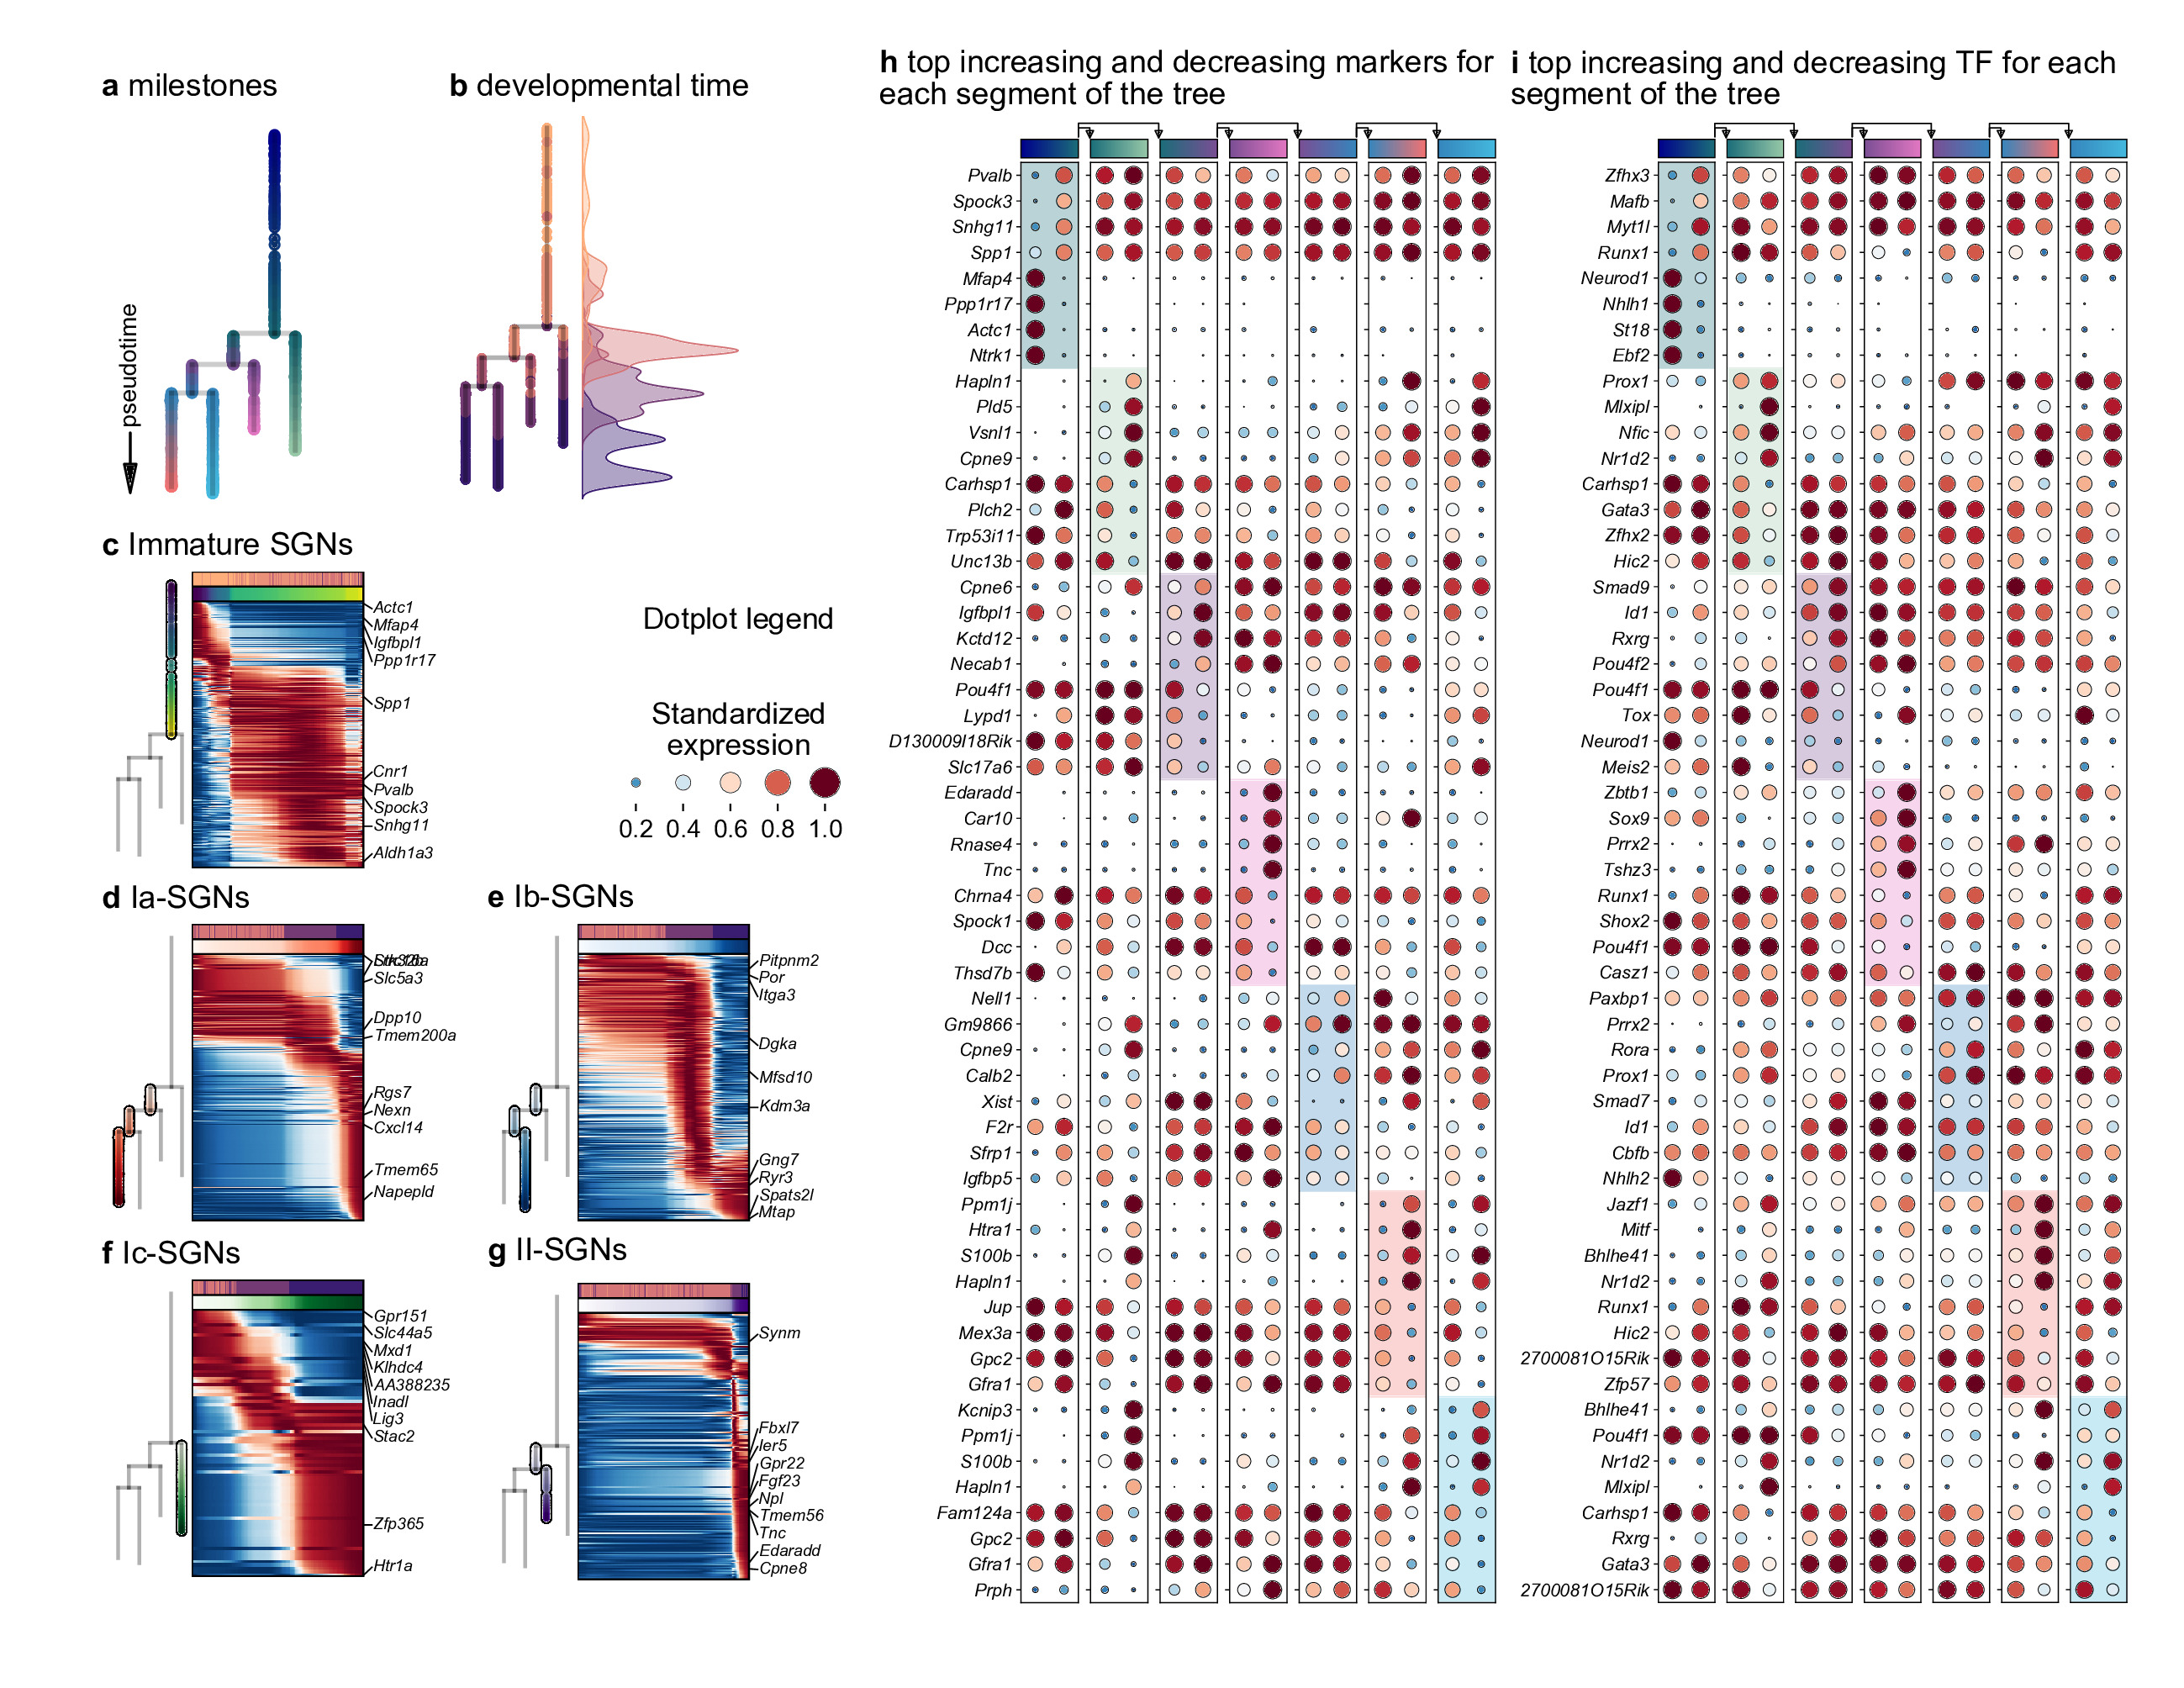

In [26]:
from IPython.display import Image
Image(filename='fig2.jpg') 